- 新算法：

$$
\begin{align*}
w_{i, k + 1} &= \sum b_{ij}\sigma_{j, k} \\
u_{i, k + 1} &= \sum b_{ij}y_{j, k} \\
v_{i, k + 1} &= \sum b_{ij}v_{j, k} \\
z_{i, k + 1} &= \frac{w_{i, k + 1}}{v_{i, k + 1}} \\
p_{i, k + 1} &= \frac{u_{i, k + 1}}{v_{i, k + 1}} \\
x_{i, k + 1} &= x_{i, k} - \alpha\left[ \nabla_1f_i(x_{i, k}, z_{i, k}) + \nabla\phi_i(x_{i, k})p_{i, k} \right] \\
\sigma_{i, k + 1} &= w_{i, k + 1} + \phi(x_{i, k + 1}) - \phi(x_{i, k}) \\
y_{i, k + 1} &= u_{i, k + 1} + \nabla_2f(x_{i, k + 1}, \sigma_{i, k + 1}) - \nabla_2f(x_{i, k}, \sigma_{i, k}) \\
\end{align*}
$$

- 初始化：$x_{i, 0}$ is arbitrary, $\sigma_{i, 0} = \phi_{i, 0}$, $v_{i, 0} = 1$, $y_{i, 0} = \nabla_2 f(x_{i, 0}, \sigma_{i, 0})$, The graph is strongly connected.

- 限制条件：$\sigma(x) = \frac{1}{N}\sum\phi_i(x_i)$

N = 5

5个敌人的坐标(1, 6), (4, 8), (9, 8), (4, 2), (8, 3)

仿真代价函数：$f_i(x_i,\sigma(x))=\frac{1}{2}\|x_i - p_i\|^2 + \frac{1}{2}\|x_i - b\|^2 + \frac{5}{N}\|\sigma(x) - b\|^2$

聚合函数：$\sigma(x) = \frac{1}{N}\sum\phi_i(x_i)$

花费函数：$\phi_i(x_i) = x_i$

$\nabla_1 f = (x - p) + (x - b)$

$\nabla_2 f = 2(\sigma(x) - b)$

In [524]:
import numpy as np
import matplotlib.pyplot as plt

# 常数
Iter_Num = 1000
n = 5
alpha = 0.01
b = [
    [1/2, 0, 0, 1/2, 1/2],
    [1/2, 1/2, 0, 0, 0],
    [0, 1/2, 1/3, 0, 0],
    [0, 0, 1/3, 1/2, 0],
    [0, 0, 1/3, 0, 1/2]
]
b = np.array(b)

# 初始化
x = np.random.randint(1, 5, n) # x是(1, 5)的随机数
x = np.float64(x)
r = np.zeros(n)
v = np.ones(n)
s = x.copy()
y = 2 * (s - 5)

# push-sum变量
u = np.zeros(n)
p = np.zeros(n)
w = np.zeros(n)
z = np.zeros(n)

# 辅助量
ans_x = [[] for i in range(n)] # 存每个点迭代过程中的x坐标  ans_x[i][tim]
ans_y = [[] for i in range(n)] # 存每个点迭代过程中的y坐标  ans_y[i][tim]
r1 = np.array([1.0, 4.0, 9.0, 4.0, 8.0]) # x坐标
r2 = np.array([6.0, 8.0, 8.0, 2.0, 3.0]) # y坐标
xx = x.copy()
vv = v.copy()
ss = s.copy()
yy = y.copy()
uu = u.copy()
pp = p.copy()
ww = w.copy()
zz = z.copy()

#------------------------------------------------------------------
def upd_v(i):
    sum = 0
    for j in range(n):
        sum += b[i, j] * v[j]
    vv[i] = sum

def upd_w(i):
    sum = 0
    for j in range(n):
        sum += b[i, j] * s[j]
    ww[i] = sum

def upd_z(i):
    zz[i] = ww[i] / vv[i]

def upd_s(i):
    ss[i] = ww[i] + xx[i] - x[i]

def upd_u(i):
    sum = 0
    for j in range(n):
        sum += b[i, j] * y[j]
    uu[i] = sum

def upd_p(i):
    pp[i] = uu[i] / vv[i]

def upd_y(i):
    yy[i] = uu[i] + (2 * (ss[i] - 5)) - (2 * (s[i] - 5))

def upd_x(i):
    xx[i] = x[i] - alpha * ((x[i] - r[i]) + (x[i] - 5) + p[i])
    # 下面为使用全局信息的算法
    # sum = 0
    # for j in range(n):
    #     sum += 2 * (get_sigma() - 5) / n
    # xx[i] = x[i] - alpha * ((x[i] - r[i]) + (x[i] - 5) + sum)

def backup():
    global x, v, s, y, u, p, w, z
    x = xx.copy()
    v = vv.copy()
    s = ss.copy()
    y = yy.copy()
    u = uu.copy()
    p = pp.copy()
    w = ww.copy()
    z = zz.copy()

def init(op):
    global x, r, r1, r2, v, s, y, u, p, w, z
    global xx, vv, ss, yy, uu, pp, ww, zz
    # fixme: 可以把这里打开
    # x = np.random.randint(1, 5, n)
    # x = np.float64(x)
    x[0] = 1.0
    x[1] = 2.0
    x[2] = 3.0
    x[3] = 4.0
    x[4] = 5.0
    if op == 1: r = r1
    else: r = r2
    v = np.ones(n)
    s = x.copy()
    y = 2 * (s - 5)
    u = np.zeros(n)
    p = np.zeros(n)
    w = np.zeros(n)
    z = np.zeros(n)
    xx = x.copy()
    vv = v.copy()
    ss = s.copy()
    yy = s.copy()
    uu = u.copy()
    pp = p.copy()
    ww = w.copy()
    zz = z.copy()

# 算法迭代
def solve(iter_num):
    global r, ans_x, ans_y
    init(1)
    for T in range(iter_num):
        for i in range(n):
            upd_w(i)
            upd_u(i)
            upd_v(i)
            upd_z(i)
            upd_p(i)
            upd_x(i)
            upd_s(i)
            upd_y(i)
            ans_x[i].append(xx[i])
        backup()
    init(2)
    for T in range(iter_num):
        for i in range(n):
            upd_w(i)
            upd_u(i)
            upd_v(i)
            upd_z(i)
            upd_p(i)
            upd_x(i)
            upd_s(i)
            upd_y(i)
            ans_y[i].append(xx[i])
        backup()

# 计算仿真代价函数
def cal(iter_num):
    sum = 0
    sum_x, sum_y = 0, 0
    for i in range(n):
        sum_x += ans_x[i][iter_num-1]
        sum_y += ans_y[i][iter_num-1]
    sum_x /= n
    sum_y /= n
    for i in range(n):
        sum += 0.5 * ((ans_x[i][iter_num-1] - r1[i]) ** 2 + (ans_y[i][iter_num-1] - r2[i]) ** 2) + \
               0.5 * ((ans_x[i][iter_num-1] - 5) ** 2 + (ans_y[i][iter_num-1] - 5) ** 2) + \
               ((sum_x - 5) ** 2 + (sum_y - 5) ** 2)
    return sum

tmp = 1000
solve(tmp)
print('经过%d轮迭代, 最终F(x)收敛到: ' % tmp, cal(tmp))

for i in range(n):
    print(ans_x[i][tmp-1], ans_y[i][tmp-1])

# 检验z的收敛性
# sum = 0
# for i in range(n):
#     sum += (ans_y[i][tmp-1])
# print(sum / n)
# for i in range(n):
#     print(z[i])

# 检验p的收敛性
# sum = 0
# for i in range(n):
#     sum += ans_y[i][tmp-1]
# sum /= n
# print(2 * (sum - 5))
# for i in range(n):
#     print(p[i])

经过1000轮迭代, 最终F(x)收敛到:  18.875
2.9500000001992603 5.399999996115055
4.449999999294366 6.3999999960843
6.949999996751828 6.399999997798429
4.4500000026935425 3.4000000045878194
6.450000001062169 3.9000000054169224


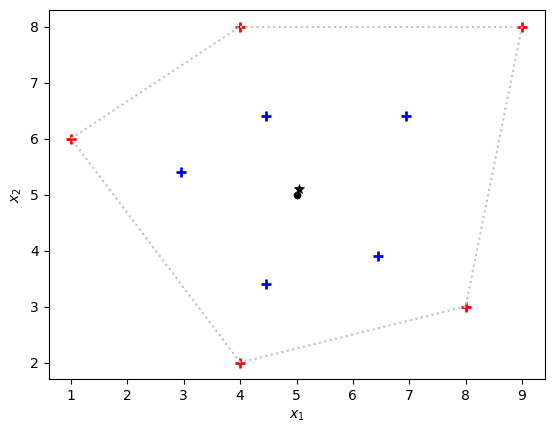

In [525]:
# 画入侵者
for i in range(n):
    plt.plot(r1[i], r2[i], marker='+', color='r', markersize='7', markeredgewidth=2)
plt.plot([r1[0], r1[1]], [r2[0], r2[1]], color='silver', linestyle='dotted')
plt.plot([r1[1], r1[2]], [r2[1], r2[2]], color='silver', linestyle='dotted')
plt.plot([r1[2], r1[4]], [r2[2], r2[4]], color='silver', linestyle='dotted')
plt.plot([r1[4], r1[3]], [r2[4], r2[3]], color='silver', linestyle='dotted')
plt.plot([r1[3], r1[0]], [r2[3], r2[0]], color='silver', linestyle='dotted')
# 画机器人
plt.xlabel('$x_1$')
plt.ylabel('$x_2$')
for i in range(n):
    plt.plot(ans_x[i][Iter_Num - 1], ans_y[i][Iter_Num - 1], marker='+', color='b', markersize='7', markeredgewidth=2)
# 画人质
plt.plot(5, 5, marker='.', color='black', markersize='7', markeredgewidth=2)
# 画中心点
sum_x, sum_y = 0, 0
for i in range(n):
    sum_x += ans_x[i][Iter_Num - 1]
    sum_y += ans_y[i][Iter_Num - 1]
plt.plot(sum_x / n, sum_y / n, marker='*', color='black', markersize='7', markeredgewidth=0.5)